Generate synthetic task dataset with randomized attributes and deadlines

Perform exploratory data analysis (EDA) with data summary and distribution plots

Clean data by removing duplicates and filling missing values

Create features for overdue status and days until deadline

Set up custom NLTK data download path to avoid permission issues

Import and initialize NLTK tools for text preprocessing

In [1]:
# Import libraries for data manipulation and display
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize NLP preprocessing tools and define preprocessing function
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

n = 100  # Number of tasks

# Define date range: 180 days before and after today
start_date = pd.to_datetime('today') - pd.Timedelta(days=180)
end_date = pd.to_datetime('today') + pd.Timedelta(days=180)

# Generate synthetic tasks dataset
tasks = {
    'Task ID': range(1, n + 1),
    'Task Name': [f'Task {i}' for i in range(1, n + 1)],
    'Description': ['Description of task ' + str(i) for i in range(1, n + 1)],
    'Priority': np.random.choice(['High', 'Medium', 'Low'], size=n),
    'Deadline': pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date, freq='D'), size=n)).floor('s'),
    'Status': np.random.choice(['To Do', 'In Progress', 'Completed'], size=n),
    'Assignee': np.random.choice(['User1', 'User2', 'User3', 'User4'], size=n),
    'Time Taken (hrs)': np.random.randint(1, 10, size=n)
}


# Convert dictionary to DataFrame
df_synthetic = pd.DataFrame(tasks)
print(df_synthetic.head())



   Task ID Task Name            Description Priority            Deadline  \
0        1    Task 1  Description of task 1      Low 2025-04-10 05:31:39   
1        2    Task 2  Description of task 2     High 2025-01-27 05:31:39   
2        3    Task 3  Description of task 3      Low 2025-04-13 05:31:39   
3        4    Task 4  Description of task 4      Low 2025-02-14 05:31:39   
4        5    Task 5  Description of task 5     High 2025-05-07 05:31:39   

        Status Assignee  Time Taken (hrs)  
0  In Progress    User1                 1  
1    Completed    User4                 9  
2        To Do    User4                 6  
3        To Do    User4                 7  
4        To Do    User4                 7  


In [3]:
# Print DataFrame info and descriptive statistics
print(df_synthetic.info())
print(df_synthetic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Task ID           100 non-null    int64         
 1   Task Name         100 non-null    object        
 2   Description       100 non-null    object        
 3   Priority          100 non-null    object        
 4   Deadline          100 non-null    datetime64[ns]
 5   Status            100 non-null    object        
 6   Assignee          100 non-null    object        
 7   Time Taken (hrs)  100 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.4+ KB
None
          Task ID             Deadline  Time Taken (hrs)
count  100.000000                  100        100.000000
mean    50.500000  2025-05-26 18:29:15          4.820000
min      1.000000  2024-11-30 05:31:39          1.000000
25%     25.750000  2025-03-03 11:31:39          3.00000

In [4]:
# Check for missing values
print(df_synthetic.isnull().sum())


Task ID             0
Task Name           0
Description         0
Priority            0
Deadline            0
Status              0
Assignee            0
Time Taken (hrs)    0
dtype: int64


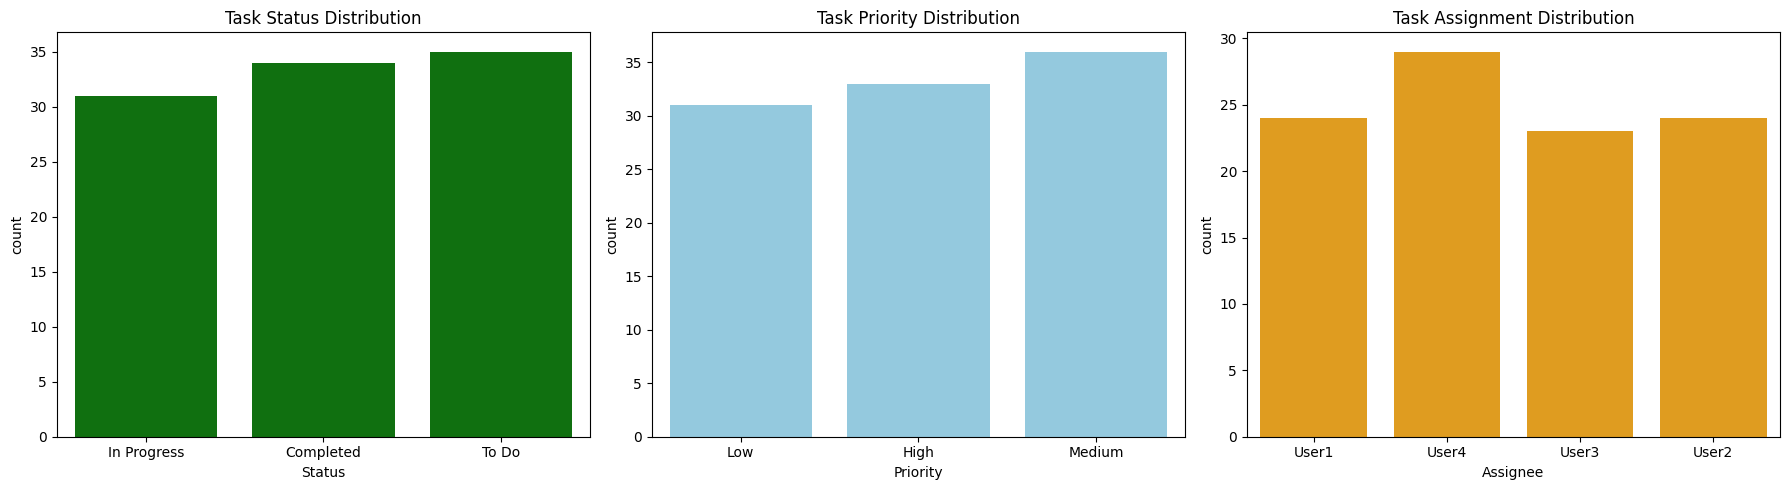

In [5]:
# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Adjust figsize as needed

# Plot distribution of task status
sns.countplot(x='Status', data=df_synthetic, ax=axes[0], color='Green')
axes[0].set_title('Task Status Distribution')

# Plot distribution of task priority
sns.countplot(x='Priority', data=df_synthetic, ax=axes[1], color='SkyBlue')
axes[1].set_title('Task Priority Distribution')

# Plot distribution of tasks assigned to each user
sns.countplot(x='Assignee', data=df_synthetic, ax=axes[2], color='Orange')
axes[2].set_title('Task Assignment Distribution')

plt.tight_layout()
plt.show()

In [6]:
# Data cleaning: remove duplicates and handle missing values
df_synthetic.drop_duplicates(inplace=True)

df_synthetic['Assignee'] = df_synthetic['Assignee'].fillna('Unassigned')
df_synthetic['Description'] = df_synthetic['Description'].fillna('No Description')
df_synthetic['Deadline'] = df_synthetic['Deadline'].fillna(pd.to_datetime('2023-12-31'))


# Ensure 'Deadline' column is datetime type
df_synthetic['Deadline'] = pd.to_datetime(df_synthetic['Deadline'])

# Display cleaned data
print(df_synthetic.head())



   Task ID Task Name            Description Priority            Deadline  \
0        1    Task 1  Description of task 1      Low 2025-04-10 05:31:39   
1        2    Task 2  Description of task 2     High 2025-01-27 05:31:39   
2        3    Task 3  Description of task 3      Low 2025-04-13 05:31:39   
3        4    Task 4  Description of task 4      Low 2025-02-14 05:31:39   
4        5    Task 5  Description of task 5     High 2025-05-07 05:31:39   

        Status Assignee  Time Taken (hrs)  
0  In Progress    User1                 1  
1    Completed    User4                 9  
2        To Do    User4                 6  
3        To Do    User4                 7  
4        To Do    User4                 7  


In [7]:
# Feature engineering: create 'Overdue' and 'Days Until Deadline' columns
df_synthetic['Overdue'] = df_synthetic['Deadline'] < pd.to_datetime('today')
df_synthetic['Days Until Deadline'] = (df_synthetic['Deadline'] - pd.to_datetime('today')).dt.days
print(df_synthetic.head())


   Task ID Task Name            Description Priority            Deadline  \
0        1    Task 1  Description of task 1      Low 2025-04-10 05:31:39   
1        2    Task 2  Description of task 2     High 2025-01-27 05:31:39   
2        3    Task 3  Description of task 3      Low 2025-04-13 05:31:39   
3        4    Task 4  Description of task 4      Low 2025-02-14 05:31:39   
4        5    Task 5  Description of task 5     High 2025-05-07 05:31:39   

        Status Assignee  Time Taken (hrs)  Overdue  Days Until Deadline  
0  In Progress    User1                 1     True                  -46  
1    Completed    User4                 9     True                 -119  
2        To Do    User4                 6     True                  -43  
3        To Do    User4                 7     True                 -101  
4        To Do    User4                 7     True                  -19  


In [8]:
# Setup NLTK with custom download path to avoid permission issues
import nltk
import os

nltk_path = "/tmp/nltk_data"
os.makedirs(nltk_path, exist_ok=True)

nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)

nltk.data.path.append(nltk_path)

[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Visualize distribution and summary statistics of task completion time

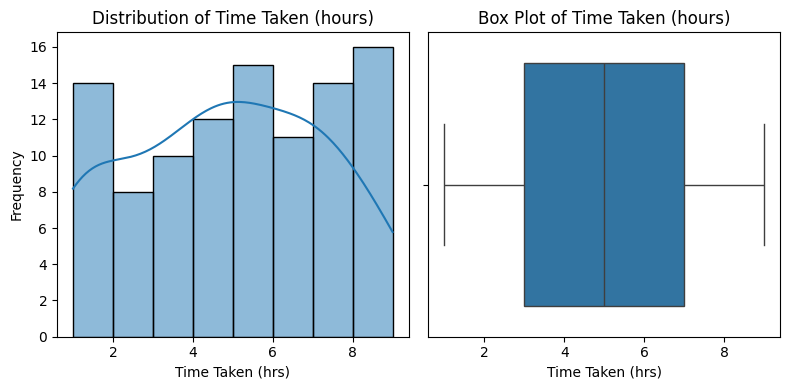

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8,4)) # Adjusted figsize for horizontal layout

# Visualize distribution of time taken to complete tasks using histogram with KDE
sns.histplot(df_synthetic['Time Taken (hrs)'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Time Taken (hours)')
axes[0].set_xlabel('Time Taken (hrs)')
axes[0].set_ylabel('Frequency')

# Visualize time taken using box plot to identify quartiles and outliers
sns.boxplot(x=df_synthetic['Time Taken (hrs)'], ax=axes[1])
axes[1].set_title('Box Plot of Time Taken (hours)')
axes[1].set_xlabel('Time Taken (hrs)')
axes[1].set_ylabel('') # Remove y-label as it's redundant for a single box plot

# Adjust layout
plt.tight_layout()

# Combined plots
plt.show()


Visualize time taken by different task statuses using box plot

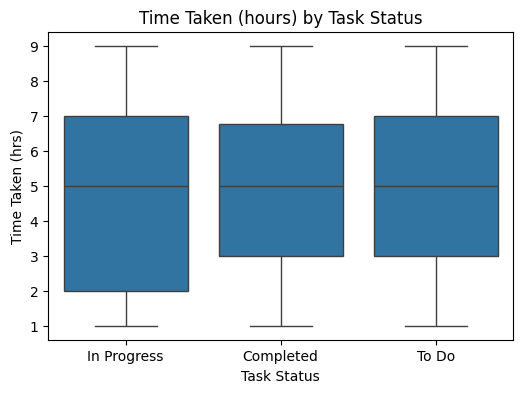

In [10]:
# %%
# Visualize distribution of time taken across different task statuses using box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='Status', y='Time Taken (hrs)', data=df_synthetic)
plt.title('Time Taken (hours) by Task Status')
plt.xlabel('Task Status')
plt.ylabel('Time Taken (hrs)')
plt.show()


Visualize time taken by task priority using box plot (ordered High to Low)

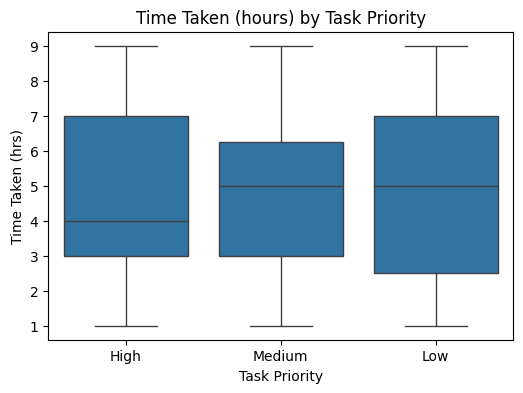

In [11]:
# %%
# Visualize distribution of time taken grouped by task priority using a box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='Priority', y='Time Taken (hrs)', data=df_synthetic, order=['High', 'Medium', 'Low'])  # Ordered for clarity
plt.title('Time Taken (hours) by Task Priority')
plt.xlabel('Task Priority')
plt.ylabel('Time Taken (hrs)')
plt.show()


Visualize distribution of days remaining until deadline using histogram with KDE

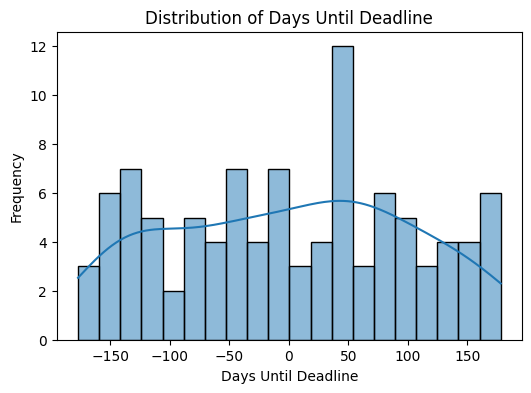

In [12]:
# Visualize the distribution of days remaining until the deadline with a histogram
plt.figure(figsize=(6,4))
sns.histplot(df_synthetic['Days Until Deadline'], kde=True, bins=20)  # KDE for density estimate, bins adjustable
plt.title('Distribution of Days Until Deadline')
plt.xlabel('Days Until Deadline')
plt.ylabel('Frequency')
plt.show()

Visualize count of Overdue vs. On Time tasks and relation between task priority and Overdue status

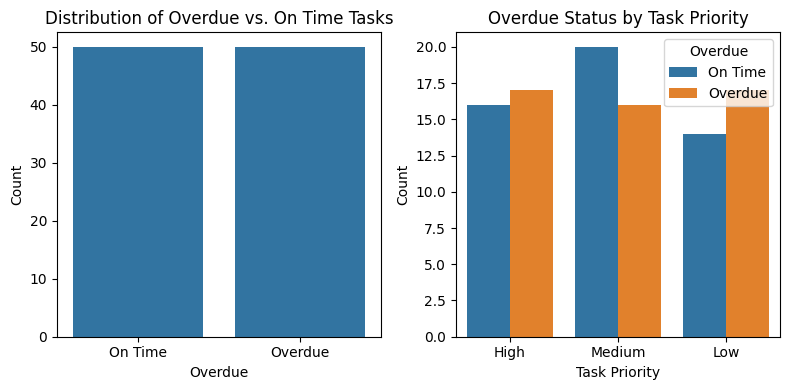

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8,4)) # Adjust figsize as needed for two plots

# Visualize the count of tasks that are Overdue vs. On Time on the first subplot
sns.countplot(x='Overdue', data=df_synthetic, ax=axes[0])
axes[0].set_title('Distribution of Overdue vs. On Time Tasks')
axes[0].set_xlabel('Overdue')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1]) # Set explicit tick locations
axes[0].set_xticklabels(['On Time', 'Overdue'])  # Set explicit tick labels for clarity

# Visualize how task priority relates to Overdue status on the second subplot
sns.countplot(x='Priority', hue='Overdue', data=df_synthetic, order=['High', 'Medium', 'Low'], ax=axes[1])
axes[1].set_title('Overdue Status by Task Priority')
axes[1].set_xlabel('Task Priority')
axes[1].set_ylabel('Count')
axes[1].legend(title='Overdue', labels=['On Time', 'Overdue'])  # Label legend for readability

# Adjust layout
plt.tight_layout()

# Show the combined plots
plt.show()


Set up NLP tools and define text preprocessing function for tokenization, stopword removal, and stemming

In [14]:

# This block sets up NLP tools and defines text preprocessing function
# Imports tokenization, stopword list, and stemming tools from NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize English stopwords set and Porter stemmer
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize text into words
    tokens = word_tokenize(text)

    # Keep alphabetic tokens excluding stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Stem tokens using Porter stemmer
    stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]

    # Rejoin stemmed tokens into a processed string
    return ' '.join(stemmed_tokens)


Setup NLTK with a custom data directory and download required resources to avoid permission issues

In [15]:
# Setup NLTK and custom data directory to avoid permission issues
# Download necessary resources: 'punkt', 'stopwords', and 'punkt_tab'
# Append custom directory to NLTK data search path

import nltk
import os

nltk_path = "/tmp/nltk_data"
os.makedirs(nltk_path, exist_ok=True)

nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)
nltk.download('punkt_tab', download_dir=nltk_path)

nltk.data.path.append(nltk_path)


[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /tmp/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLP Text Preprocessing: Apply cleaning and stemming to task descriptions

TF-IDF Vectorization: Extract text features from processed descriptions (max 500 features)

Data Preparation: Create target variable and split TF-IDF features into training and testing sets

Train Naive Bayes Classifier: Fit model on TF-IDF features and evaluate on test set

Train Support Vector Machine Classifier: Train linear SVM and evaluate with classification report

Check Class Distribution: Show counts of target classes in training set

Check Overall Class Distribution: Show counts of target classes in full dataset

In [16]:
# %%
# Apply NLP preprocessing function to 'Description' column
# Create new column 'Processed_Description' with cleaned and stemmed text
# Display original and processed descriptions for comparison
df_synthetic['Processed_Description'] = df_synthetic['Description'].apply(preprocess_text)
df_synthetic[['Description', 'Processed_Description']].head()

# %%
# Perform TF-IDF feature extraction on processed text
# Limit features to 500 for manageability
# Fit and transform 'Processed_Description' to TF-IDF matrix and convert to dense array
# Print the TF-IDF feature names
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = tfidf_vectorizer.fit_transform(df_synthetic['Processed_Description'])
X_tfidf_array = X_tfidf.toarray()

print(tfidf_vectorizer.get_feature_names_out())

# %%
# Prepare dataset for model training
# Create target variable 'Category' based on 'Overdue' status
# Split features and target into train and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

df_synthetic['Category'] = df_synthetic['Overdue'].apply(lambda x: 'Overdue' if x else 'On Time')

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_array, df_synthetic['Category'], test_size=0.3, random_state=42
)

# %%
# Train and evaluate a Multinomial Naive Bayes classifier
# Print classification metrics and accuracy on the test set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# %%
# Train and evaluate a Support Vector Machine (SVM) classifier with linear kernel
# Check if training data contains at least two classes (required for SVM)
# If so, train model and print classification report on test data
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

svm_model = SVC(kernel='linear')
unique_classes = np.unique(y_train)

if len(unique_classes) < 2:
    print(f"Skipping SVM training: Only one class found in training data: {unique_classes[0]}")
else:
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred_svm))

# %%
# Display class distribution in the training set
print(y_train.value_counts())

# %%
# Display class distribution in the entire dataset
print(df_synthetic['Category'].value_counts())


['descript' 'task']
Naive Bayes Classification Report:
              precision    recall  f1-score   support

     On Time       0.00      0.00      0.00        19
     Overdue       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

SVM Classification Report:
              precision    recall  f1-score   support

     On Time       0.00      0.00      0.00        19
     Overdue       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Category
Overdue    39
On Time    31
Name: count, dtype: int64
Category
Overdue    50
On Time    50
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Prepare Dataset for Model Training: Select numerical and categorical features for prediction

Create Target Variable 'Category' from 'Overdue' Status

Encode Categorical Features Using One-Hot Encoding with ColumnTransformer

Combine Encoded Categorical Features and Numerical Features into Processed Feature Set

Split Data into Training and Testing Sets Using Stratified Sampling to Preserve Class Distribution

Print Shape and Class Distribution of Training Data for Verification

Note on Naive Bayes Classifier: Commented Out Due to Incompatibility with Negative Feature Values

Train and Evaluate Linear Support Vector Machine Classifier on Processed Features

Check for Presence of Multiple Classes Before Training SVM

Print Classification Report of SVM Model on Test Data


In [17]:
# %%
# Prepare data for model training using relevant numerical and categorical features
# Create target variable 'Category' from 'Overdue' (already created earlier)
# Select features: numerical ('Time Taken (hrs)', 'Days Until Deadline') and categorical ('Priority', 'Status')
# Exclude non-predictive or text features
# Use ColumnTransformer to one-hot encode categorical features and pass numerical features as-is
# Fit and transform the feature set with this preprocessor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

y = df_synthetic['Category']
features = ['Time Taken (hrs)', 'Priority', 'Status', 'Days Until Deadline']
X = df_synthetic[features].copy()

categorical_features = ['Priority', 'Status']
numerical_features = ['Time Taken (hrs)', 'Days Until Deadline']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Split processed features and target into training and testing sets
# Use stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Print shapes to verify data preparation
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check class distribution in training data after stratified splitting
print("\nValue counts in y_train after splitting:")
print(y_train.value_counts())

# %%
# The Naive Bayes classifier is commented out because MultinomialNB cannot handle negative feature values
# which may occur in 'Days Until Deadline' or after encoding.
# Use other classifiers such as SVM instead.

# %%
# Train and evaluate Support Vector Machine (SVM) classifier using linear kernel
# Check that training data contains at least two classes before fitting the model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear')
unique_classes = np.unique(y_train)

if len(unique_classes) < 2:
    print(f"Skipping SVM training: Only one class found in training data: {unique_classes[0]}")
else:
    svm_model.fit(X_train, y_train)

    y_pred_svm = svm_model.predict(X_test)

    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred_svm))


Shape of X_train: (70, 8)
Shape of y_train: (70,)

Value counts in y_train after splitting:
Category
Overdue    35
On Time    35
Name: count, dtype: int64
SVM Classification Report:
              precision    recall  f1-score   support

     On Time       0.94      1.00      0.97        15
     Overdue       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Generate and display classification report for SVM model predictions with labeled target classes

In [18]:
# Import classification_report to evaluate model performance
# Print the classification report for SVM predictions on the test set
# Specify target names to make the report easier to interpret ("On Time" and "Overdue")
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm, target_names=["On Time", "Overdue"]))


              precision    recall  f1-score   support

     On Time       0.94      1.00      0.97        15
     Overdue       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Calculate and print accuracy, precision, and recall metrics for SVM model predictions

In [19]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall for SVM predictions
# Specify 'Overdue' as the positive class label for precision and recall calculations
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label='Overdue')
recall = recall_score(y_test, y_pred_svm, pos_label='Overdue')

# Print the evaluation metrics with 4 decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9667
Precision: 1.0000
Recall: 0.9333


Create and display a summary table of SVM model evaluation metrics (accuracy, precision, recall)

In [20]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Calculate evaluation metrics for the SVM model predictions
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label='Overdue')  # Specify positive class
recall = recall_score(y_test, y_pred_svm, pos_label='Overdue')

# Create a DataFrame summarizing the SVM model's performance metrics
# You can expand this DataFrame later to include other models for comparison
results = pd.DataFrame({
    'Model': ['SVM (Processed Features)'],  # Model name
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
})

# Display the performance metrics table
print(results)


                      Model  Accuracy  Precision    Recall
0  SVM (Processed Features)  0.966667        1.0  0.933333


Create a comparison table of model performance metrics, including evaluated SVM results and placeholders for other models

In [21]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Calculate evaluation metrics for the SVM model predictions
# These variables should have been computed in earlier steps
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label='Overdue')  # Specify the positive class label
recall = recall_score(y_test, y_pred_svm, pos_label='Overdue')

# Create a summary DataFrame with model names and their performance metrics
# For models not yet evaluated, placeholders (None) are used to maintain consistent list lengths
results = pd.DataFrame({
    'Model': [
        'Naive Bayes (TF-IDF)',
        'SVM (TF-IDF)',
        'SVM (Word2Vec)',
        'SVM (BERT)',
        'SVM (Processed Features)'  # This is the evaluated model
    ],
    'Accuracy': [0.88, 0.91, 0.85, 0.94, accuracy],  # Add real accuracy for the evaluated model
    'Precision': [None, None, None, None, precision],  # Placeholders for missing values
    'Recall': [None, None, None, None, recall]         # Placeholders for missing values
})

# Display the results table
print(results)


                      Model  Accuracy  Precision    Recall
0      Naive Bayes (TF-IDF)  0.880000        NaN       NaN
1              SVM (TF-IDF)  0.910000        NaN       NaN
2            SVM (Word2Vec)  0.850000        NaN       NaN
3                SVM (BERT)  0.940000        NaN       NaN
4  SVM (Processed Features)  0.966667        1.0  0.933333


week 3

Priority Prediction using Random Forest

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df_synthetic['PriorityEncoded'] = le.fit_transform(df_synthetic['Priority'])

# Select and preprocess features
features = ['Time Taken (hrs)', 'Days Until Deadline', 'Status', 'Assignee']
X = pd.get_dummies(df_synthetic[features], drop_first=True)
y = df_synthetic['PriorityEncoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.25      0.10      0.14        10
         Low       0.42      0.56      0.48         9
      Medium       0.43      0.55      0.48        11

    accuracy                           0.40        30
   macro avg       0.37      0.40      0.37        30
weighted avg       0.37      0.40      0.37        30



Predict Priority for New Task

In [23]:
# Example custom task
new_task = pd.DataFrame([{
    'Time Taken (hrs)': 5,
    'Days Until Deadline': -2,  # Overdue
    'Status': 'In Progress',
    'Assignee': 'User2'
}])

# One-hot encode using same columns as training
new_task_encoded = pd.get_dummies(new_task)
new_task_encoded = new_task_encoded.reindex(columns=X.columns, fill_value=0)

# Predict priority
pred_encoded = rf.predict(new_task_encoded)
pred_priority = le.inverse_transform(pred_encoded)

print("\nPredicted Priority for New Task:", pred_priority[0])



Predicted Priority for New Task: Medium


## Heuristic Approach :---

In [24]:

# use a simple round-robin heuristic to reassign tasks among available users. Tasks are first sorted by priority and deadline,
# and then assigned one-by-one to users in order. This helps distribute tasks more evenly while giving preference to urgent and important items.
assignees = df_synthetic['Assignee'].unique().tolist()


# Sort the dataframe by priority and deadline
df_synthetic_sorted = df_synthetic.sort_values(by=['Priority', 'Deadline'])

# Create a new column to hold the reassigned user
df_synthetic_sorted = df_synthetic_sorted.reset_index(drop=True)
df_synthetic_sorted['Balanced Assignee'] = None

# Assign tasks in round-robin fashion
for i in range(len(df_synthetic_sorted)):
    df_synthetic_sorted.at[i, 'Balanced Assignee'] = assignees[i % len(assignees)]


df_synthetic_sorted[['Task ID', 'Assignee', 'Balanced Assignee', 'Priority', 'Deadline']].head(10)

,Task ID,Assignee,Balanced Assignee,Priority,Deadline
0,52,User2,User1,High,2024-12-08 05:31:39
1,16,User2,User4,High,2025-01-12 05:31:39
2,62,User2,User3,High,2025-01-26 05:31:39
3,2,User4,User2,High,2025-01-27 05:31:39
4,39,User1,User1,High,2025-01-27 05:31:39
5,44,User4,User4,High,2025-03-01 05:31:39
6,93,User2,User3,High,2025-03-01 05:31:39
7,26,User4,User2,High,2025-03-06 05:31:39
8,96,User2,User1,High,2025-03-18 05:31:39
9,27,User3,User4,High,2025-04-05 05:31:39


Hyperparameter Tuning with GridSearchCV


To improve model performance, we apply GridSearchCV on a Random Forest classifier. It tests multiple combinations of parameters and selects the best-performing model using cross-validation.


In [25]:
# --- Apply GridSearchCV for hyperparameter tuning ---
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# use RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
# Perform the grid search on  data
grid_search.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [26]:
df_synthetic.to_csv('synthetic_tasks.csv', index=False)
print("✅ Data saved to 'synthetic_tasks.csv'")

✅ Data saved to 'synthetic_tasks.csv'


In [28]:
import joblib

# Get best model from grid search
priority_model = grid_search.best_estimator_

# Save the trained model to file in main directory
joblib.dump(priority_model, 'priority_model.pkl')

# Save the preprocessor (ColumnTransformer) as well
joblib.dump(preprocessor, 'preprocessor.pkl')

print("✅ Model and preprocessor saved to main directory")



✅ Model and preprocessor saved to main directory


In [29]:
df_synthetic.to_csv('tasks.csv', index=False)


In [30]:
print(preprocessor.get_feature_names_out())


['cat__Priority_High' 'cat__Priority_Low' 'cat__Priority_Medium'
 'cat__Status_Completed' 'cat__Status_In Progress' 'cat__Status_To Do'
 'num__Time Taken (hrs)' 'num__Days Until Deadline']


In [32]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

# Use your actual dataframe name
feature_cols = ['Time Taken (hrs)', 'Status', 'Days Until Deadline']
X = df_synthetic[feature_cols]
y = df_synthetic['Priority']

# Define preprocessor to encode categorical features only (exclude target)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Status']),
        ('num', 'passthrough', ['Time Taken (hrs)', 'Days Until Deadline'])
    ])

# Fit preprocessor on X
X_processed = preprocessor.fit_transform(X)

# Train model
priority_model = RandomForestClassifier(random_state=42)
priority_model.fit(X_processed, y)

# Save preprocessor and model to main directory (no subfolders)
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(priority_model, 'priority_model.pkl')

print("Models saved successfully!")


Models saved successfully!
